# Unsupervised Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Team NM4**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

Team Members
1. Bakwe Chokoe
2. Hlawulekani Rikhotso
3. Tshepiso Ngwato
4. Benson Kamau
5. Nozipho
6. Mutondi Tshivhase
### Predict Overview



<a id="cont"></a>

## Table of Contents

<a href=#one>1. Introduction</a>

<a href=#two>2. Problem Statement</a>

<a href=#three>3. Importing Packages</a>

<a href=#four>4. Loading Data</a>

<a href=#five>5. Pre-processing</a>

<a href=#six>6. Exploratory Data Analysis (EDA)</a>

<a href=#seven>7. Data Engineering</a>

<a href=#eight>8. Modeling</a>

<a href=#nine>9. Model Performance</a>

<a href=#ten>10. Model Explanations</a>

<a href=#eleven>11. Conclusion</a>


 <a id="one"></a>
## **1. Introduction**







In [1]:
# Write the introduction

 <a id="one"></a>
## 2. Problem Statement
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Problem Statement ⚡ |
| :--------------------------- |
| In this section you are required to introduce and elaborate on the problem statement or challenge you are required to solve. |


In [2]:
# Discuss the problem statement

 <a id="one"></a>
## 3. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [3]:
#pip install comet_ml

In [4]:
from comet_ml import Experiment
#from comet_ml.integration.pytorch import log_model

In [100]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pickle
# Set ggplot style
plt.style.use('ggplot')
# Libraries for data preparation and model building
# Import KMeans model
from sklearn.cluster import KMeans
# Import time to measure algorithm runtime 
from time import time
from surprise import Reader,Dataset
#packages we need
from surprise import accuracy,SlopeOne,SVDpp
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate,GridSearchCV
from surprise import  KNNBasic, SVD, NormalPredictor, BaselineOnly, KNNBaseline, NMF,KNNWithMeans

#vectorizing 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
# declaring an object of tfidf vectoriser
from sklearn.metrics.pairwise import cosine_similarity
# Transform features
from scipy.sparse import csr_matrix
# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###


<a id="two"></a>
## 4. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [6]:
# load the dataframe from the given dataset
df_train =pd.read_csv(r'C:\Users\hp\Documents\GitHub\unsurpervised_data\ea-movie-recommendation-predict-2023-2024\train.csv')
df_genome_tags=pd.read_csv(r'C:\Users\hp\Documents\GitHub\unsurpervised_data\ea-movie-recommendation-predict-2023-2024\genome_tags.csv')
df_movies=pd.read_csv(r'C:\Users\hp\Documents\GitHub\unsurpervised_data\ea-movie-recommendation-predict-2023-2024\movies.csv')
df_links=pd.read_csv(r'C:\Users\hp\Documents\GitHub\unsurpervised_data\ea-movie-recommendation-predict-2023-2024\links.csv')
df_genome_scores=pd.read_csv(r'C:\Users\hp\Documents\GitHub\unsurpervised_data\ea-movie-recommendation-predict-2023-2024\genome_scores.csv')
df_tags=pd.read_csv(r'C:\Users\hp\Documents\GitHub\unsurpervised_data\ea-movie-recommendation-predict-2023-2024\tags.csv')
df_imdb_data=pd.read_csv(r'C:\Users\hp\Documents\GitHub\unsurpervised_data\ea-movie-recommendation-predict-2023-2024\imdb_data.csv')
df_test=pd.read_csv(r'C:\Users\hp\Documents\GitHub\unsurpervised_data\ea-movie-recommendation-predict-2023-2024\test.csv')

<a id="two"></a>
## 5. Pre-processing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### Viewing the shape of the dataframes

Here we are just having a view of the shape of varoius dataframes in our dataset i.e.
 - df_imdb_data
 - df_genome_tags
 - df_genome_scores
 - df_train
 - df_links
 - df_movies
 - df_tags

In [7]:
# Pre-process the data
df_train.shape

(10000038, 4)

In [8]:
df_genome_tags.shape

(1128, 2)

In [9]:
df_genome_scores.shape

(15584448, 3)

In [10]:
df_tags.shape

(1093360, 4)

In [11]:
df_links.shape

(62423, 3)

In [12]:
df_movies.shape

(62423, 3)

In [13]:
df_imdb_data.shape

(27278, 6)

### Checking for null values in the various dataframes in the given  dataset

Here in this sections we will be checking for `null values ` in the various dataframes in the data set i.e.
 - df_imdb_data
 - df_genome_tags
 - df_genome_scores
 - df_train
 - df_links
 - df_movies
 - df_tags

In [14]:
#checking for null in imdb dataframe
df_imdb_data.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

In [15]:
#checking for null in genome tags dataframe
df_genome_tags.isnull().sum()

tagId    0
tag      0
dtype: int64

In [16]:
#checking for null in genome score dataframe
df_genome_scores.isnull().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

In [17]:
#checking for null in train dataframe
df_train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [18]:
#checking for null in links dataframe
df_links.isnull().sum()

movieId      0
imdbId       0
tmdbId     107
dtype: int64

In [19]:
#checking for null in tags dataframe
df_tags.isnull().sum()


userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [20]:
#checking for null in movies dataframe
df_movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

### Viewing content in the tables

In [21]:
df_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [22]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [23]:
df_genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [24]:
df_genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [25]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [26]:
df_train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [27]:
df_imdb_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [28]:
from datetime import datetime
import re
#function for formating time
def formattime(t):
    time=datetime.utcfromtimestamp(t).strftime('%Y-%m-%d %H:%M:%S')
    return time
 #function extracting number   
def extract_number(n):
    number = "".join([ch for ch in n if ch.isdigit()])
    return number
 # functon for extracting clean string from our title column   
def extract_string(n):
    brackets=['(',')']
    string = "".join([ch for ch in n if not ch.isdigit() and ch not in brackets])
    return string
 #this function will split the text by |   
def split_text(n):
    text_split = " ".join(n.split("|"))
    return text_split


Applying the fucntions described above to `df_movies['genres'],df_movies['title']` column in order to extract the individual genres,year from title, and title itself without the year 

In [29]:
# splitting genres
df_movies['clean_genres']=df_movies['genres'].apply(split_text)

In [30]:
# extract title and year into their respective indivual column
df_movies['title_year']=df_movies['title'].apply(extract_number)
df_movies['title_string']=df_movies['title'].apply(extract_string)

In [31]:
# formatime time
df_train['f_time']=df_train['timestamp'].apply(formattime)

In [32]:
df_movies.head()

,movieId,title,genres,clean_genres,title_year,title_string
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,1995,Toy Story
1,2,Jumanji (1995),Adventure|Children|Fantasy,Adventure Children Fantasy,1995,Jumanji
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy Romance,1995,Grumpier Old Men
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Comedy Drama Romance,1995,Waiting to Exhale
4,5,Father of the Bride Part II (1995),Comedy,Comedy,1995,Father of the Bride Part II


In [33]:
df_tags['f_time_tag']=df_tags['timestamp'].apply(formattime)

In [34]:
# drop null values in tags and links dataframe
df_tags_clean=df_tags.dropna()
df_links_clean=df_links.dropna()

In [35]:
df_imdb_data.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

In [36]:
# we will drop the columns with more than 50% null values in the imdb_data dataframe
#here we are checking the number of null values in columns
val=df_imdb_data[df_imdb_data.columns[0]].count()
for col in df_imdb_data.columns:
    na =df_imdb_data[col].isnull().sum()
    per_na=round(na/val*100,2)
    print(f"The percent of null values in {col} is {per_na}")

The percent of null values in movieId is 0.0
The percent of null values in title_cast is 36.91
The percent of null values in director is 36.2
The percent of null values in runtime is 44.32
The percent of null values in budget is 71.02
The percent of null values in plot_keywords is 40.61


In [37]:

df_imdb_data=df_imdb_data.drop('budget', axis=1)

In [38]:
df_imdb_data = df_imdb_data.replace(' ', np.nan)                   # to get rid of empty values
nan_value = df_imdb_data[df_imdb_data.isna().any(axis=1)]         # to get all rows with Na

nan_value.head() 

,movieId,title_cast,director,runtime,plot_keywords
29,30,Li Gong|Baotian Li|Xiaoxiao Wang|Xuejian Li|Ch...,Feiyu Bi,NaN,NaN
76,77,Nico|Tina Aumont|Christian Päffgen|Edith Boulo...,Susanne Ofteringer,NaN,f rated|female musician|singer songwriter|inte...
107,109,Raymond J. Barry|Rustam Branaman|Jennifer MacD...,James Bruce,NaN,topless bar|topless|stripper|jeans
109,111,NaN,NaN,NaN,NaN
117,119,Andy Garcia|Alan Arkin|Rachel Ticotin|Joe Pant...,Andrew Davis,NaN,lawyer|estate|twin brother|brother brother rel...


In [39]:
#df[df.isin(['Rich Burns']).any(axis=1)]

In [40]:

df_imdb=df_imdb_data

#Removing rows with more than 2 null values from our data
max_null_values = 2
rows_to_remove = []
for index, row in df_imdb.iterrows():
    if row.isnull().sum() > max_null_values:
        rows_to_remove.append(index)

#df_cleaned = rows_to_remove #nan_values.drop(rows_to_remove)
df_imdb_clean=df_imdb.drop(rows_to_remove,axis=0)
df_imdb_clean.head()



,movieId,title_cast,director,runtime,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,fatherhood|doberman|dog|mansion


In [41]:
# Replace NaN values in 'runtime' with the average runtime for each director
df_imdb_clean['runtime'] = df_imdb_clean.groupby('director')['runtime'].transform(lambda x: x.fillna(x.mean()))
# Replace NaN values in 'title_cast' with the mode for each director
df_imdb_clean['title_cast'] = df_imdb_clean.groupby('director')['title_cast'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))
df_imdb_clean.head()

,movieId,title_cast,director,runtime,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,fatherhood|doberman|dog|mansion


In [42]:
# here we are filling the null values of title cast with director
df_imdb_clean['title_cast'] = df_imdb_clean['title_cast'].fillna(df_imdb_clean['director'])

#here we are filling runtime null values  with  mean runtime for the movies
df_imdb_clean['runtime'] = df_imdb_clean['runtime'].fillna(df_imdb_clean['runtime'].mean())


In [43]:
df_imdb_clean.isnull().sum()

movieId             0
title_cast         32
director           32
runtime             0
plot_keywords    1223
dtype: int64

In [44]:
# drop null values in imdb
df_imdb_clean=df_imdb_clean
df_imdb_clean=df_imdb_clean.dropna(subset=['director'])

In [45]:
df_imdb_clean.isnull().sum()

movieId             0
title_cast          0
director            0
runtime             0
plot_keywords    1222
dtype: int64

In [46]:
df_imdb_clean_final=df_imdb_clean.dropna()

In [47]:
# Splitting the title_cast column and creating pairs
df_imdb_clean_final['cast_pairs'] = df_imdb_clean_final['title_cast'].apply(lambda x: ','.join(sorted(x.split('|'))))
df_imdb_clean_final['plot_keywords'] = df_imdb_clean_final['plot_keywords'].apply(lambda x: ','.join(sorted(x.split('|'))))
df_imdb_clean_final.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_11000\1665174329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imdb_clean_final['cast_pairs'] = df_imdb_clean_final['title_cast'].apply(lambda x: ','.join(sorted(x.split('|'))))
C:\Users\hp\AppData\Local\Temp\ipykernel_11000\1665174329.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imdb_clean_final['plot_keywords'] = df_imdb_clean_final['plot_keywords'].apply(lambda x: ','.join(sorted(x.split('|'))))


,movieId,title_cast,director,runtime,plot_keywords,cast_pairs
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"cgi animation,cowboy,rivalry,toy","Annie Potts,Don Rickles,Erik von Detten,Jack A..."
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"adventurer,board game,fight,game","Adam Hann-Byrd,Bebe Neuwirth,Bonnie Hunt,Bradl..."
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"boat,lake,neighbor,rivalry","Allison Levine,Ann Morgan Guilbert,Ann-Margret..."
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"betrayal,black american,husband wife relations...","Angela Bassett,Brandon Hammond,Dennis Haysbert..."
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"doberman,dog,fatherhood,mansion","April Ortiz,BD Wong,Diane Keaton,Dulcy Rogers,..."


In [48]:
df_movies_clean=df_movies
df_movies_clean = df_movies.drop(['genres'], axis=1)
df_movies_clean.head()

,movieId,clean_genres,title_year,title_string
0,1,Adventure Animation Children Comedy Fantasy,1995,Toy Story
1,2,Adventure Children Fantasy,1995,Jumanji
2,3,Comedy Romance,1995,Grumpier Old Men
3,4,Comedy Drama Romance,1995,Waiting to Exhale
4,5,Comedy,1995,Father of the Bride Part II


In [49]:
#df_nogenre=df_m.loc[df_m['clean_genres'] == '(no genres listed)']
#df_nogenre
df_movies_clean['clean_genres'] = df_movies_clean['clean_genres'].replace(['(no genres listed)'], 'no_genre')
#df_movies['title_string'] = df_movies.apply(lambda row: '-'.join(row), axis=1)
df_movies_clean.head()


,movieId,clean_genres,title_year,title_string
0,1,Adventure Animation Children Comedy Fantasy,1995,Toy Story
1,2,Adventure Children Fantasy,1995,Jumanji
2,3,Comedy Romance,1995,Grumpier Old Men
3,4,Comedy Drama Romance,1995,Waiting to Exhale
4,5,Comedy,1995,Father of the Bride Part II


In [50]:
# Define a function to extract the year
def extract_year(number):
    number_str = str(number)
    year_str = number_str[-4:]
    return year_str


In [51]:
# Apply the function to the 'number_column' and create a new column 'extracted_year'
df_movies_clean['title_year'] = df_movies_clean['title_year'].apply(extract_year)

In [52]:
#CONVERTING THE datatype to int
df_movies_clean['title_year'] = pd.to_numeric(df_movies_clean['title_year'], errors='coerce')

In [53]:
df_tags.head()

,userId,movieId,tag,timestamp,f_time_tag
0,3,260,classic,1439472355,2015-08-13 13:25:55
1,3,260,sci-fi,1439472256,2015-08-13 13:24:16
2,4,1732,dark comedy,1573943598,2019-11-16 22:33:18
3,4,1732,great dialogue,1573943604,2019-11-16 22:33:24
4,4,7569,so bad it's good,1573943455,2019-11-16 22:30:55


In [54]:
#working on datetime 
df_tags['f_time_tag'] = pd.to_datetime(df_tags['f_time_tag'])

# Split into year, month, and day columns
df_tags['tag_year'] = df_tags['f_time_tag'].dt.year
df_tags['tag_month'] = df_tags['f_time_tag'].dt.month
df_tags['tag_day'] = df_tags['f_time_tag'].dt.day


In [55]:
df_tags_clean = df_tags.drop(['timestamp','f_time_tag'],axis = 1)

In [56]:
df_tags_clean.head()

,userId,movieId,tag,tag_year,tag_month,tag_day
0,3,260,classic,2015,8,13
1,3,260,sci-fi,2015,8,13
2,4,1732,dark comedy,2019,11,16
3,4,1732,great dialogue,2019,11,16
4,4,7569,so bad it's good,2019,11,16


In [57]:
#df_train.head()
#working on datetime 
df_train['f_time'] = pd.to_datetime(df_train['f_time'])

# Split into year, month, and day columns
df_train['train_year'] = df_train['f_time'].dt.year
df_train['train_month'] = df_train['f_time'].dt.month
df_train['train_day'] = df_train['f_time'].dt.day

In [58]:
df_train_clean=df_train.drop(['timestamp','f_time'],axis = 1)
df_train_clean.head()

,userId,movieId,rating,train_year,train_month,train_day
0,5163,57669,4.0,2018,2,11
1,106343,5,4.5,2008,3,23
2,146790,5459,5.0,2004,2,8
3,106362,32296,2.0,2015,2,4
4,9041,366,3.0,1996,5,29


In [59]:
# merging  tags and movies frames for training 
df_movies_tags=df_movies_clean.merge(df_tags_clean,on='movieId', how='left')
df_movies_tags.shape

(1110532, 9)

In [60]:
#merging movies and links data
df_merge_movie_tags_imdb=pd.merge(df_movies_tags, df_imdb_clean_final, on='movieId', how='left')
df_merge_movie_tags_imdb.head()

,movieId,clean_genres,title_year,title_string,userId,tag,tag_year,tag_month,tag_day,title_cast,director,runtime,plot_keywords,cast_pairs
0,1,Adventure Animation Children Comedy Fantasy,1995.0,Toy Story,791.0,Owned,2018.0,1.0,5.0,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"cgi animation,cowboy,rivalry,toy","Annie Potts,Don Rickles,Erik von Detten,Jack A..."
1,1,Adventure Animation Children Comedy Fantasy,1995.0,Toy Story,1048.0,imdb top 250,2007.0,2.0,22.0,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"cgi animation,cowboy,rivalry,toy","Annie Potts,Don Rickles,Erik von Detten,Jack A..."
2,1,Adventure Animation Children Comedy Fantasy,1995.0,Toy Story,1361.0,Pixar,2008.0,7.0,15.0,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"cgi animation,cowboy,rivalry,toy","Annie Potts,Don Rickles,Erik von Detten,Jack A..."
3,1,Adventure Animation Children Comedy Fantasy,1995.0,Toy Story,3164.0,Pixar,2008.0,10.0,6.0,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"cgi animation,cowboy,rivalry,toy","Annie Potts,Don Rickles,Erik von Detten,Jack A..."
4,1,Adventure Animation Children Comedy Fantasy,1995.0,Toy Story,3164.0,time travel,2008.0,10.0,6.0,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"cgi animation,cowboy,rivalry,toy","Annie Potts,Don Rickles,Erik von Detten,Jack A..."


In [61]:
# Joining the names in the 'cast_pairs' column by hyphen
#df_imdb_clean1['cast_pairs_hyphen'] = df_imdb_clean1['cast_pairs'].apply(lambda x: '-'.join(sorted(x.split(' '))))
#df_imdb_clean1=df_imdb_clean1.drop(['title_cast','cast_pairs'], axis = 1)
#df_imdb_clean1.head()

In [62]:
#performing natural languange processing for title string to create plot keywords for the null values 
import nltk
#from nltk.tokenize import word_tokenize
#from nltk.corpus import stopwords
#from nltk.stem import PorterStemmer
#from nltk.probability import FreqDist

<a id="three"></a>
## 6. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


    
 ⚡ Description: Exploratory data analysis ⚡ 

This is section where we will investigate data in details on all merged dataframes. here we will work with `df_merge_all` dataframe  


###  Non graphical Statistics 

In [63]:
# look at data statistics

#df_rating_mean=df_merge_movie_tags_imdb.rating.mean()
#df_rating_mean

In [64]:
# avg runtime
df_runtime_mean=df_merge_movie_tags_imdb.runtime.mean()
df_runtime_mean

115.23376814142925

In [65]:
# avg relevance
#df_relevance_mean=df_merge_movie_tags_imdb.relevance.mean()
#df_relevance_mean

### Graphical  Exploratory Data Analysis 

In [66]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns

In [67]:
# plot relevant feature interactions
#words = []
#for i in df_merge_movie_tags_imdb.clean_genres:
    #words.extend(word_tokenize(i))
    
#wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(frequencies = Counter(words))
#plt.figure(figsize=(15,10))
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")

Here we will look at the distribution of the features in out data set

### **Working with the Directors column**

Let’s plot top 20  Directors with most number of  movies

C:\Users\hp\AppData\Local\Temp\ipykernel_11000\1892729556.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imdb_clean_final['director'] = df_imdb_clean_final['director'].apply(xstr)


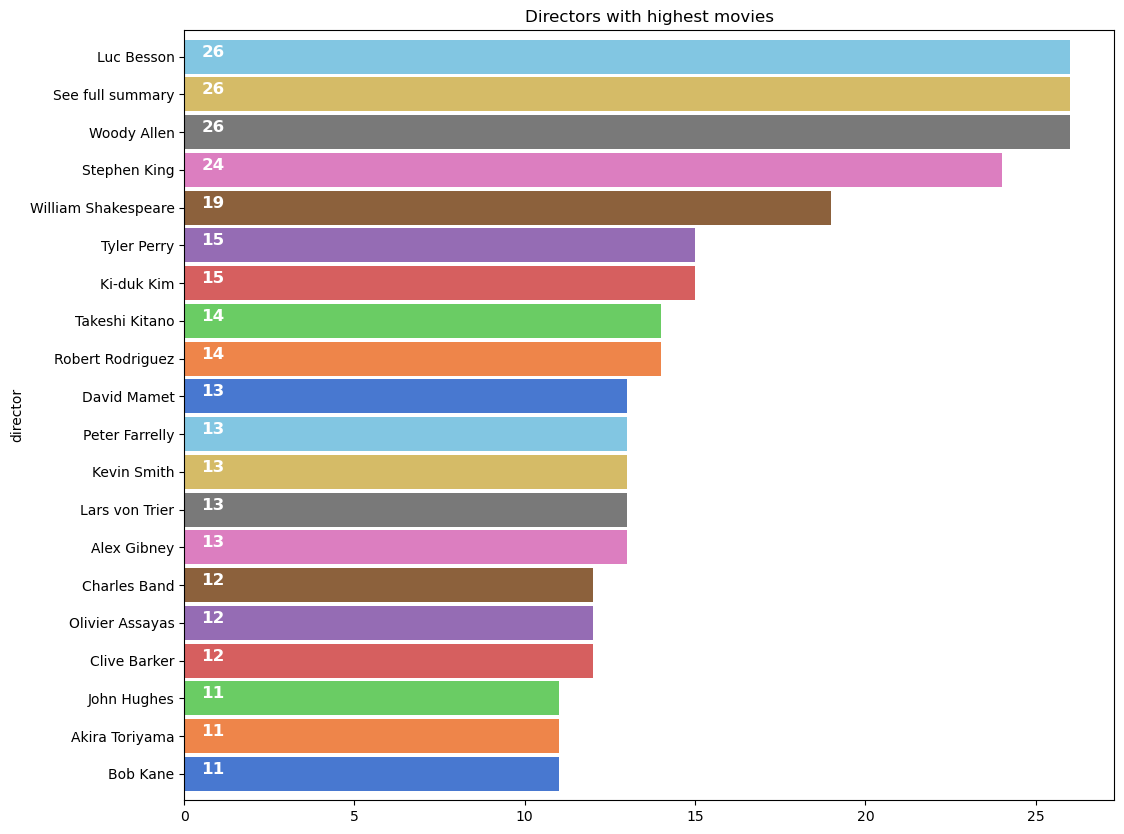

In [68]:
def xstr(s):
    if s is None:
        return ''
    return str(s)
df_imdb_clean_final['director'] = df_imdb_clean_final['director'].apply(xstr)
plt.subplots(figsize=(12,10))
ax = df_imdb_clean_final[df_imdb_clean_final['director']!=''].director.value_counts()[:20].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(df_imdb_clean_final[df_imdb_clean_final['director']!=''].director.value_counts()[:20].sort_values(ascending=True).values): 
    ax.text(.5, i, v,fontsize=12,color='white',weight='bold')
plt.title('Directors with highest movies')
plt.show()

In [69]:
df_merge_movie_tags_imdb.head(1)

,movieId,clean_genres,title_year,title_string,userId,tag,tag_year,tag_month,tag_day,title_cast,director,runtime,plot_keywords,cast_pairs
0,1,Adventure Animation Children Comedy Fantasy,1995.0,Toy Story,791.0,Owned,2018.0,1.0,5.0,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"cgi animation,cowboy,rivalry,toy","Annie Potts,Don Rickles,Erik von Detten,Jack A..."


In [70]:
df_train_clean.head(1)

,userId,movieId,rating,train_year,train_month,train_day
0,5163,57669,4.0,2018,2,11


### Working with rating in train data

Here we will be looking at the most popular directors in terms of movie production 

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


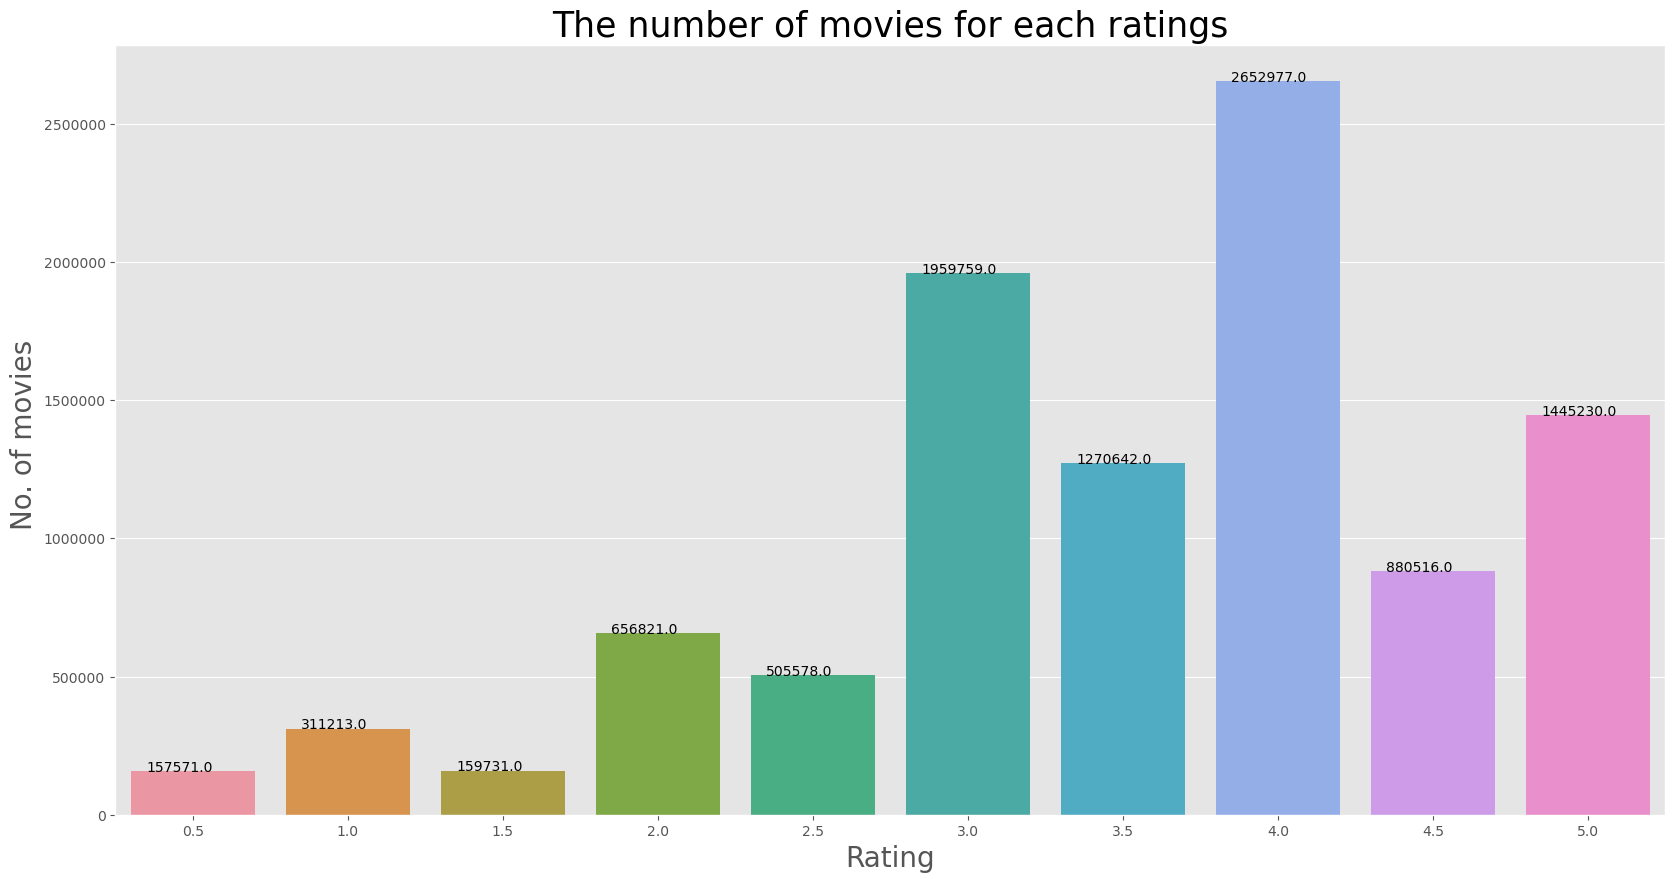

In [101]:
# Plotting the graph
fig, ax = plt.subplots(figsize=(20, 10)) # Initialize the plot with set figure size

sns.countplot(ax=ax, x='rating', data=df_train_clean) # Create a countplot to visualise the number of movies per category
ax.set_title("The number of movies for each ratings", size=25)
plt.ticklabel_format(style='plain', axis='y', useOffset=False ) # Set the tick labels to appear in non-scientific form

# Make the counts appear on the different
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
    
# Show the countplot
plt.xlabel('Rating', size=20)
plt.ylabel('No. of movies ', size=20)
#plt.title('Top 10 average rating per year', size=25)
plt.show()

### working with rating of the movies in our train dataset

Here we ere looking at yearly,monthly and daily rating for the data set

Here we are looking at monthly rating

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


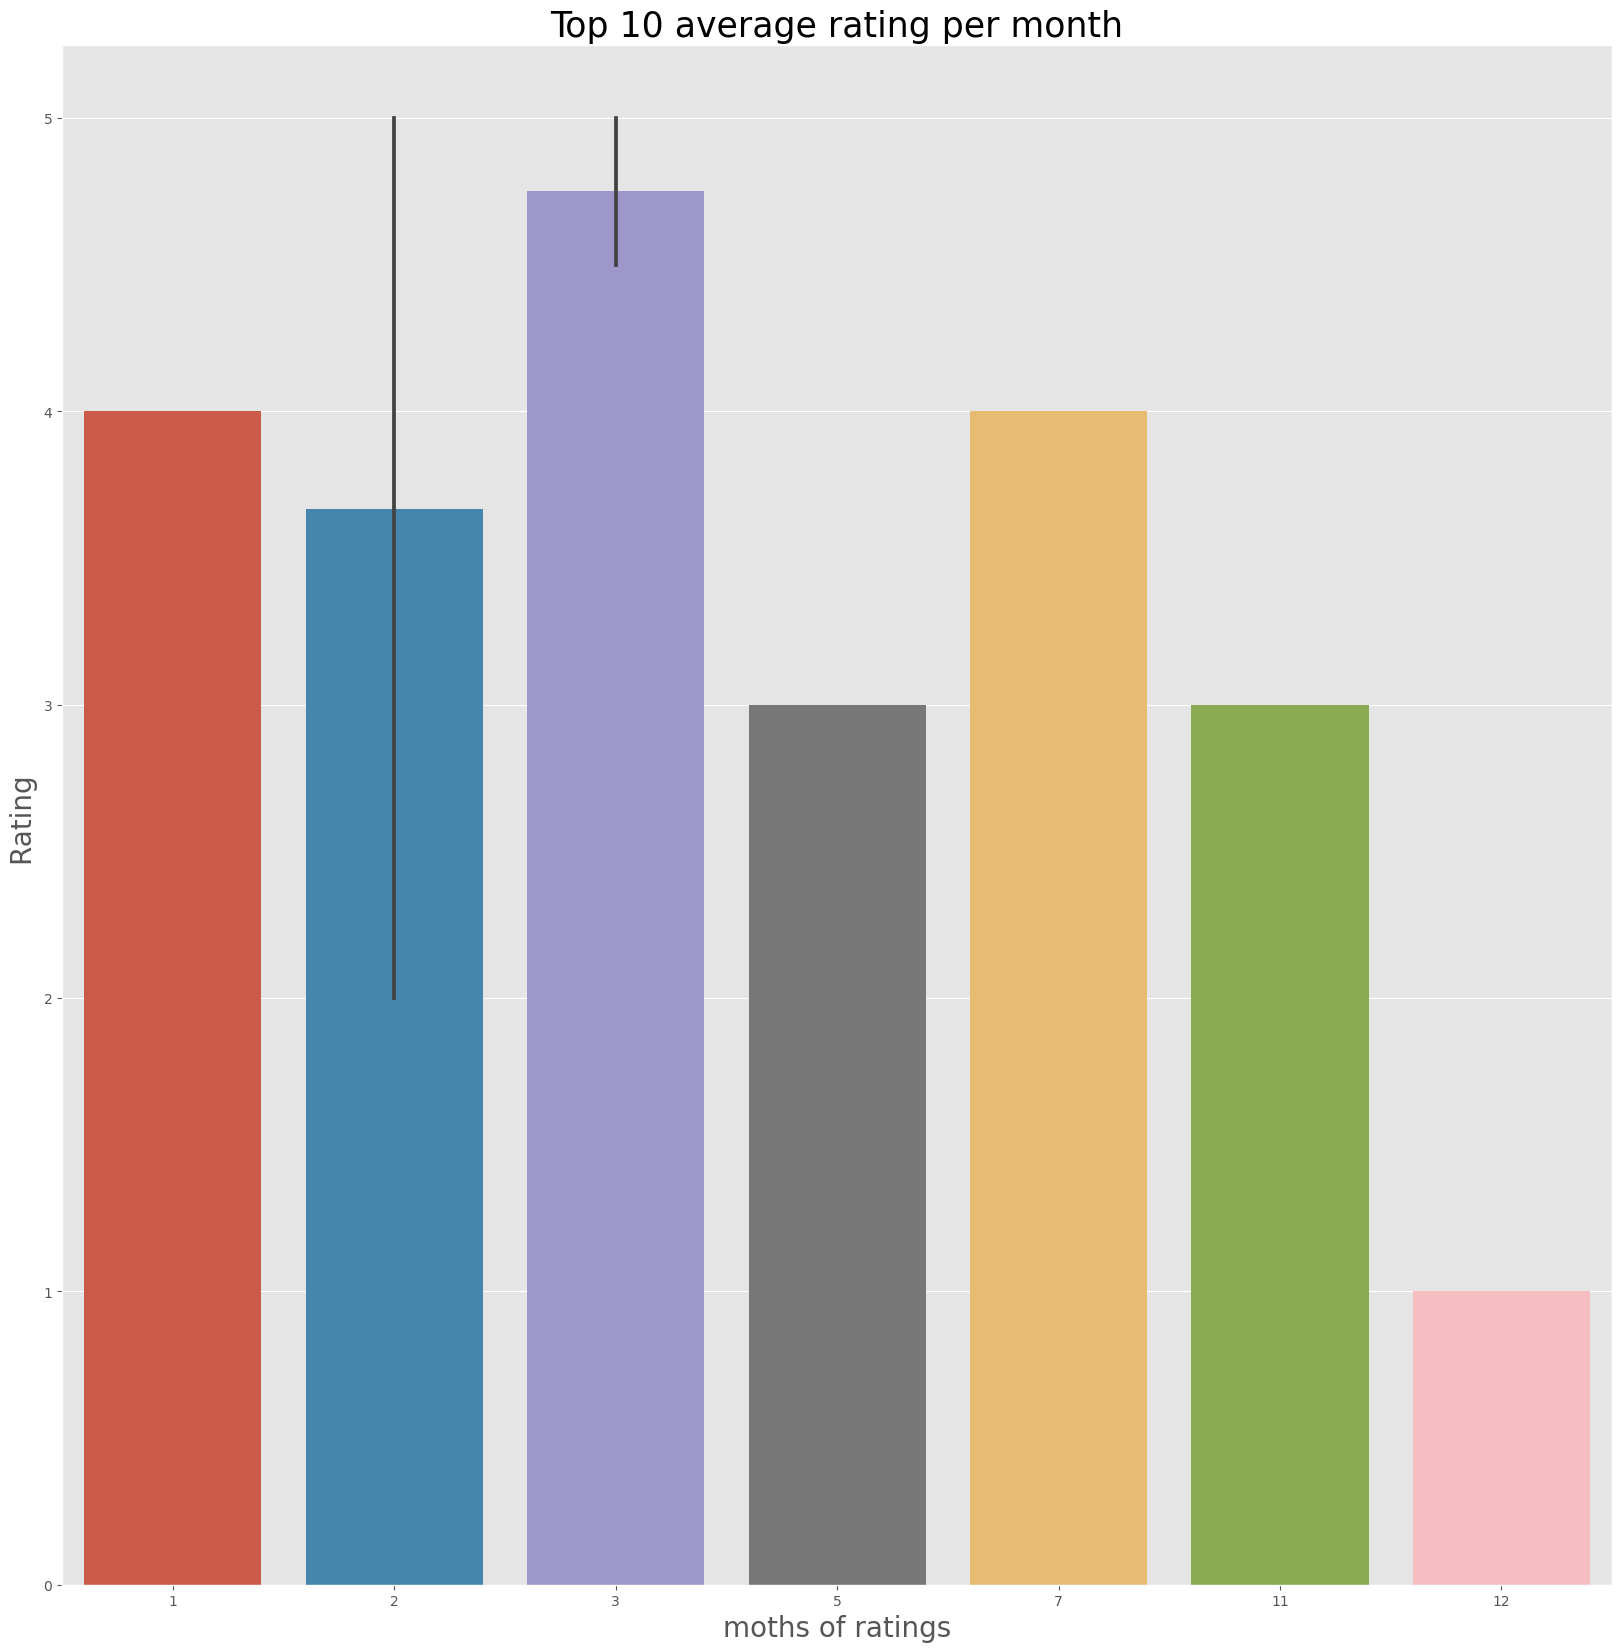

In [102]:
# Ploting top genres in the Dataset
plt.figure(figsize=(20, 20))
# Create a barplot to visualise the trend for monthly movie rating
sns.barplot( x='train_month',y = 'rating',data=df_train.head(10))
plt.xlabel('moths of ratings', size=20)
plt.ylabel('Rating ', size=20)
plt.title('Top 10 average rating per month', size=25)
plt.show()

Here we are looking at yearly rating

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


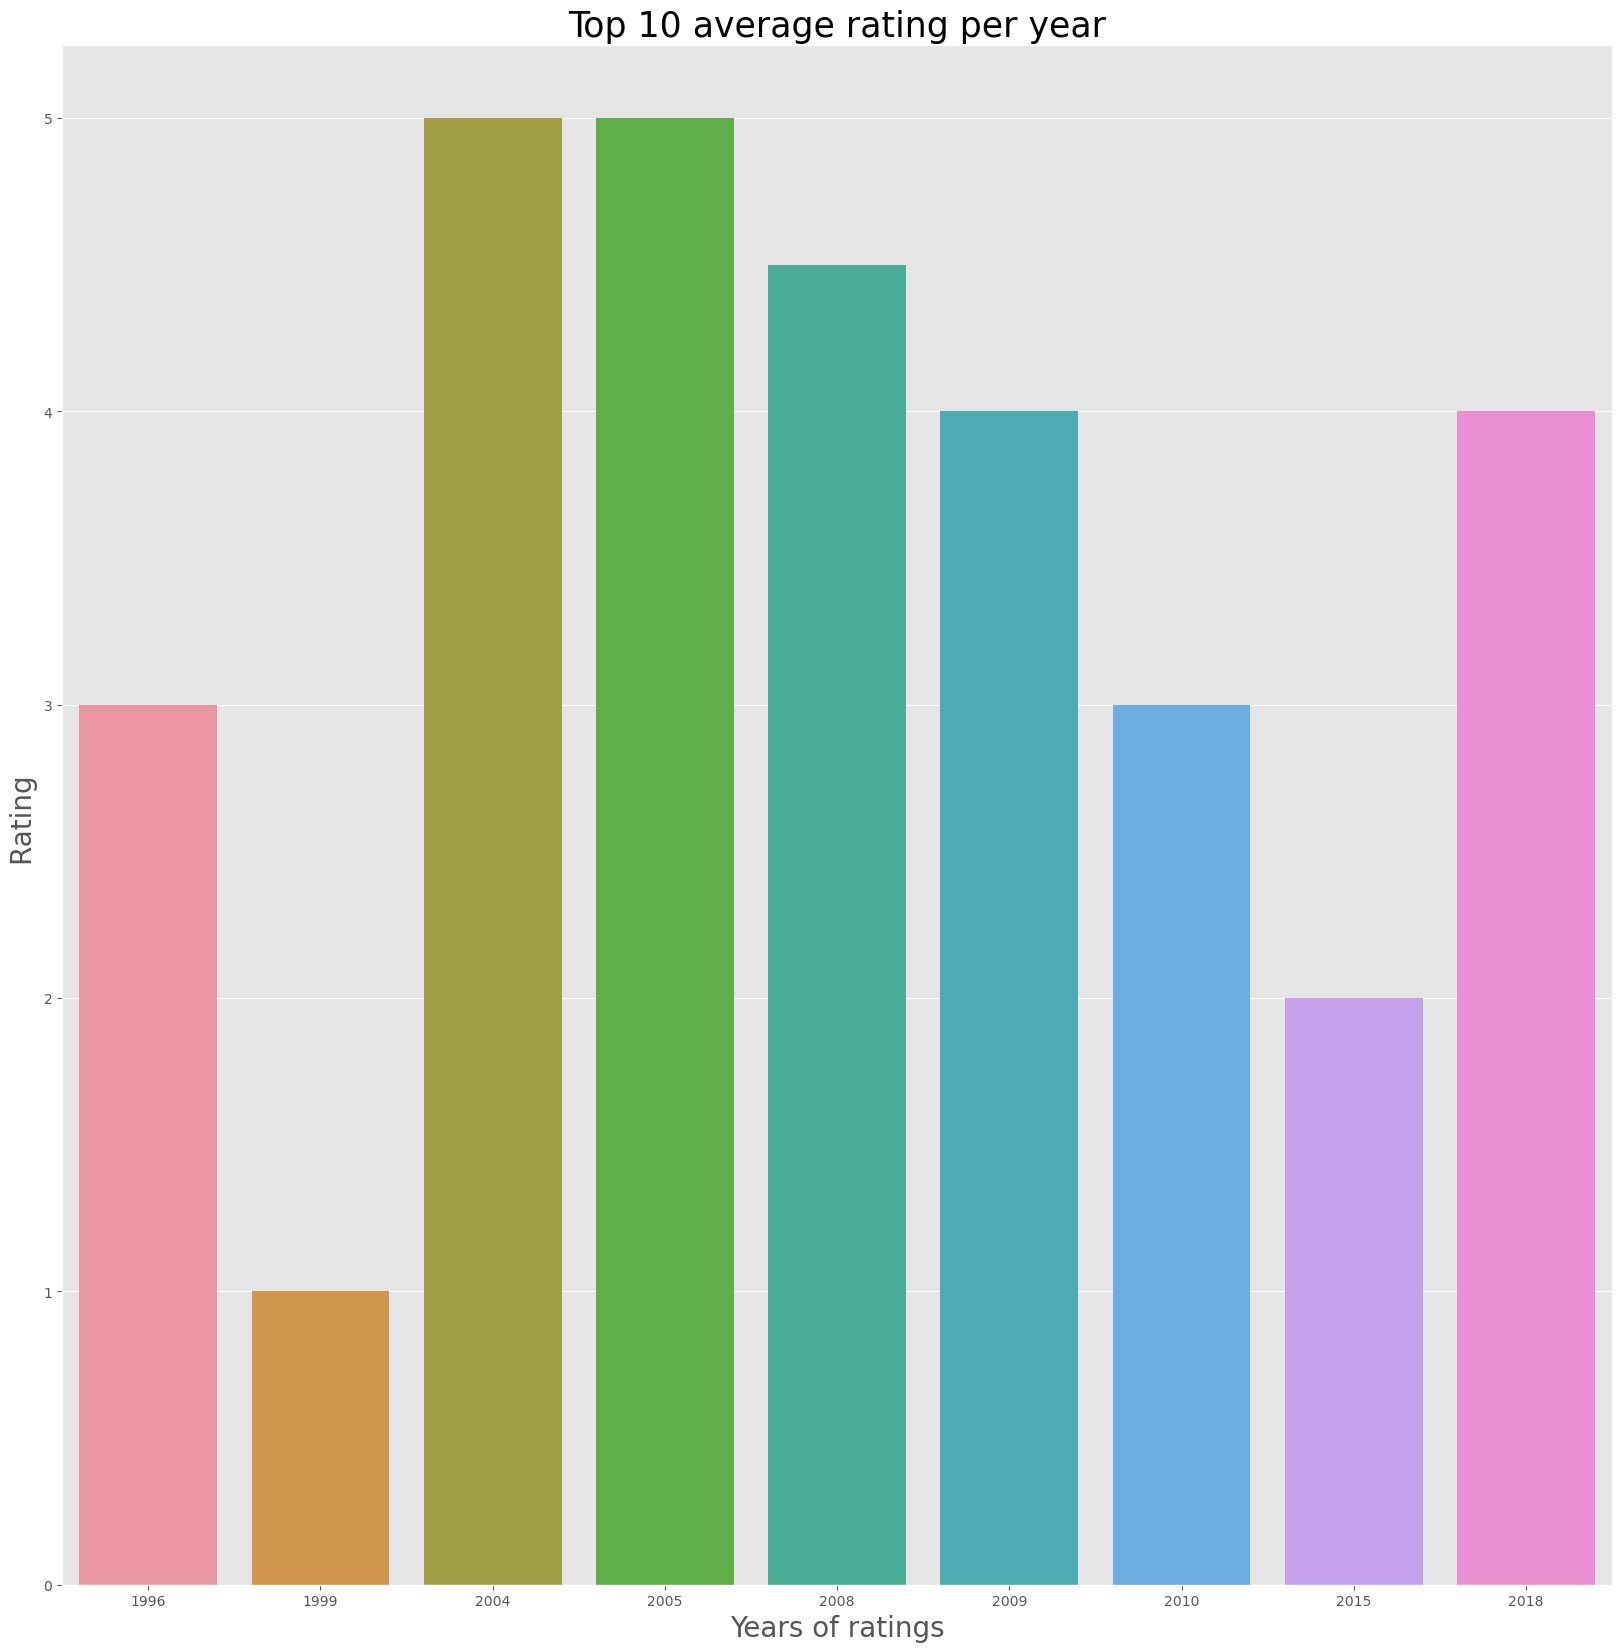

In [103]:
# Ploting top genres in the Dataset
plt.figure(figsize=(20, 20))
# Create a barplot to visualise the trend for monthly movie rating
sns.barplot( x='train_year',y = 'rating',data=df_train.head(10))
plt.xlabel('Years of ratings', size=20)
plt.ylabel('Rating ', size=20)
plt.title('Top 10 average rating per year', size=25)
plt.show()

Here we are looking at daily rating 

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


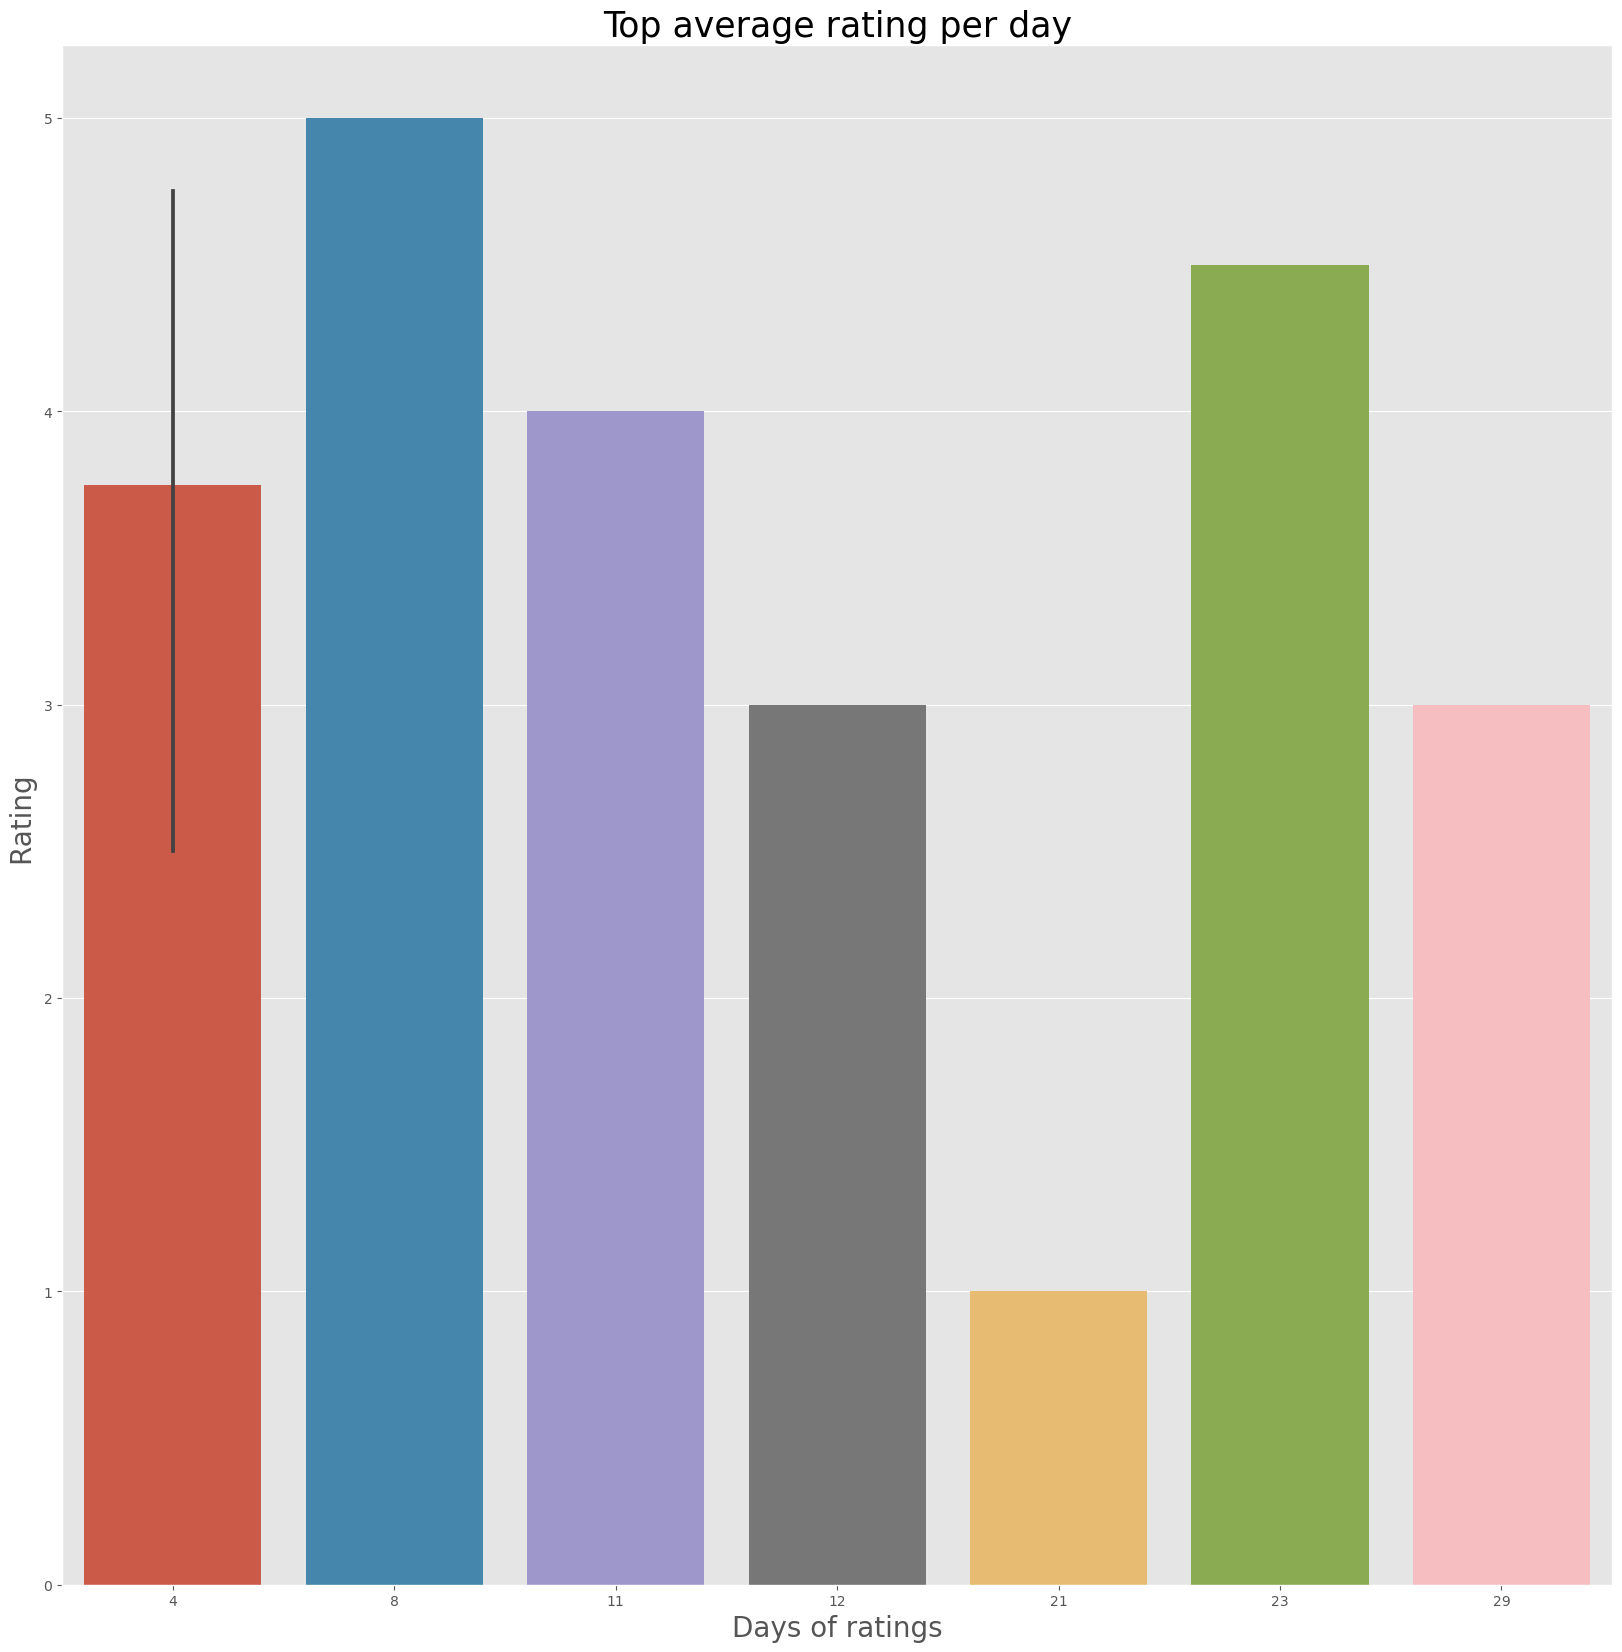

In [104]:
# Ploting top genres in the Dataset
plt.figure(figsize=(20, 20))
# Create a barplot to visualise the trend for monthly movie rating
sns.barplot( x='train_day',y = 'rating',data=df_train.head(10))
plt.xlabel('Days of ratings', size=20)
plt.ylabel('Rating ', size=20)
plt.title('Top average rating per day', size=25)
plt.show()

### Working with the plot keywords 

Here we are looking at the distribution of the most popular keywords used in the movie plot

In [85]:
# Get the categories of Movie Genre per movie ID.
# Each Genre should stand unique to enable classification
keyword = pd.DataFrame(df_imdb_clean_final['plot_keywords'].str.split("|").tolist(),
                      index=df_imdb_clean_final['movieId']).stack()
keyword = keyword.reset_index([0, 'movieId'])
keyword.columns = ['movieId', 'plot_keyword']
keyword.head()

,movieId,plot_keyword
0,1,"cgi animation,cowboy,rivalry,toy"
1,2,"adventurer,board game,fight,game"
2,3,"boat,lake,neighbor,rivalry"
3,4,"betrayal,black american,husband wife relations..."
4,5,"doberman,dog,fatherhood,mansion"


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


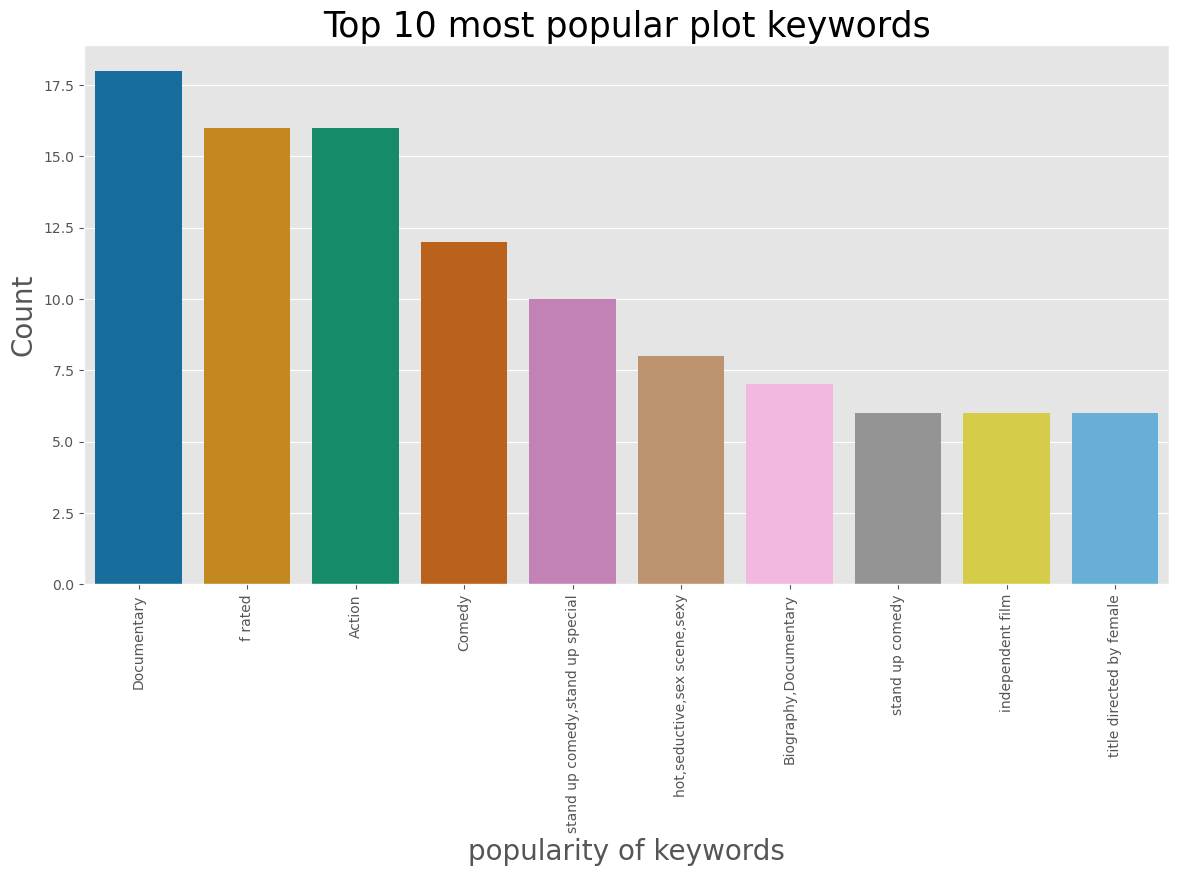

In [105]:
# Ploting top keywords in the Dataset
fig, ax = plt.subplots(figsize=(14, 7))
sns.countplot(x='plot_keyword', data=keyword, palette='colorblind',
              order=keyword['plot_keyword'].value_counts().head(10).index)
plt.xticks(rotation=90)
plt.xlabel('popularity of keywords', size=20)
plt.ylabel('Count', size=20)
plt.title('Top 10 most popular plot keywords', size=25)
plt.show()

### Working with cast distribution 

Here we are looking at how many movies has actor partcipated in. IE how many mvoies have these poeple been involved in for the purspose of our analysis

In [76]:
df_imdb_clean.head()

,movieId,title_cast,director,runtime,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,fatherhood|doberman|dog|mansion


In [106]:
# Get the categories of Movie Genre per movie ID.
# Each Genre should stand unique to enable classification
cast = pd.DataFrame(df_imdb_clean['title_cast'].str.split("|").tolist(),
                      index=df_imdb_clean['movieId']).stack()
cast = cast.reset_index([0, 'movieId'])
cast.columns = ['movieId', 'title_cast']
cast.head()

,movieId,title_cast
0,1,Tom Hanks
1,1,Tim Allen
2,1,Don Rickles
3,1,Jim Varney
4,1,Wallace Shawn


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


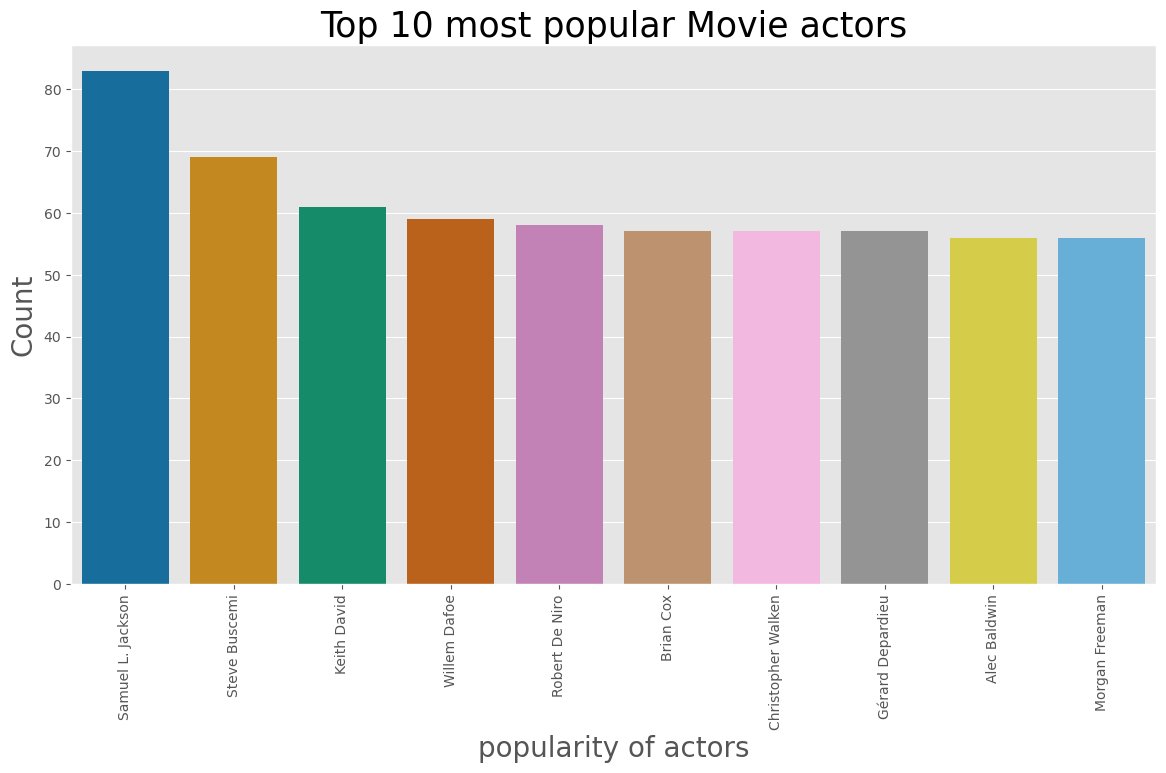

In [107]:


fig, ax = plt.subplots(figsize=(14, 7))
sns.countplot(x='title_cast', data=cast, palette='colorblind',
              order=cast['title_cast'].value_counts().head(10).index)
plt.xticks(rotation=90)
plt.xlabel('popularity of actors', size=20)
plt.ylabel('Count', size=20)
plt.title('Top 10 most popular Movie actors', size=25)
plt.show()

### working with genres 

Here we are further investigating the distribution of genre movies in our movie data set

In [108]:
# Get the categories of Movie Genre per movie ID.
# Each Genre should stand unique to enable classification
genres = pd.DataFrame(df_movies['genres'].str.split("|").tolist(),
                      index=df_movies['movieId']).stack()
genres = genres.reset_index([0, 'movieId'])
genres.columns = ['movieId', 'genre']
genres.head()

,movieId,genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


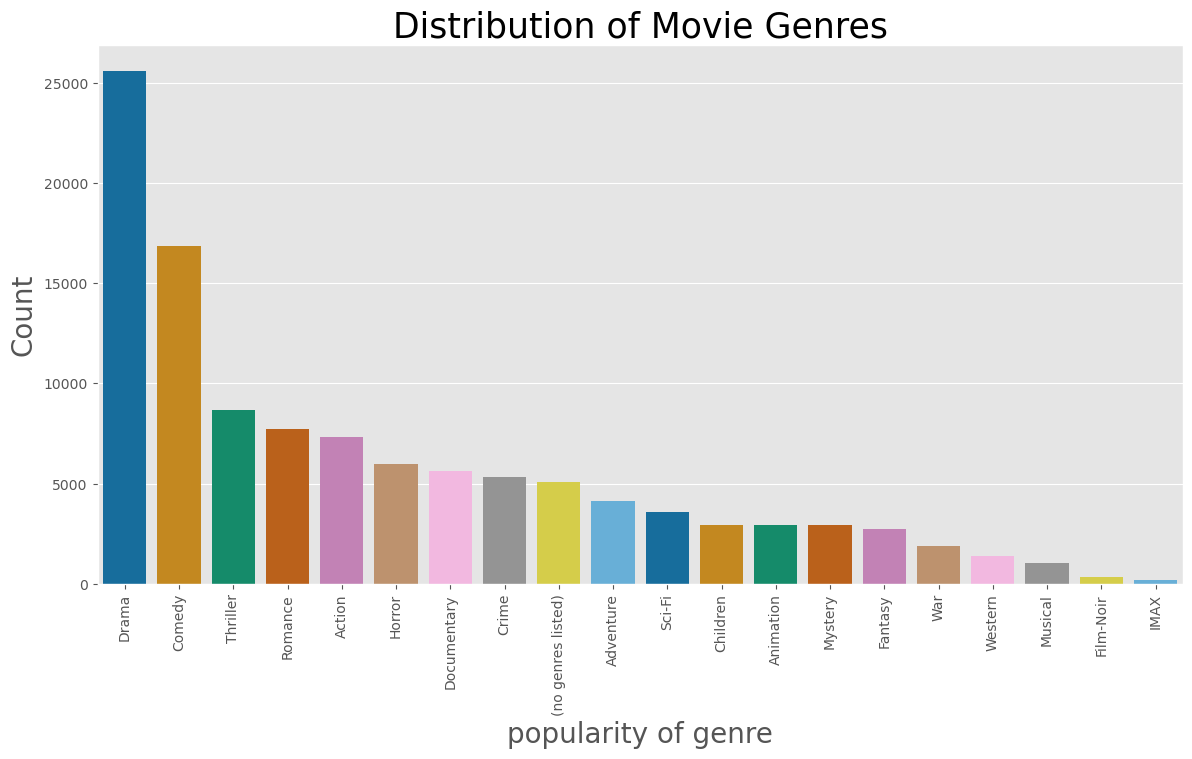

In [123]:


fig, ax = plt.subplots(figsize=(14, 7))
sns.countplot(x='genre', data=genres, palette='colorblind',
              order=genres['genre'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('popularity of genre', size=20)
plt.ylabel('Count', size=20)
plt.title('Distribution of Movie Genres', size=25)
plt.show()

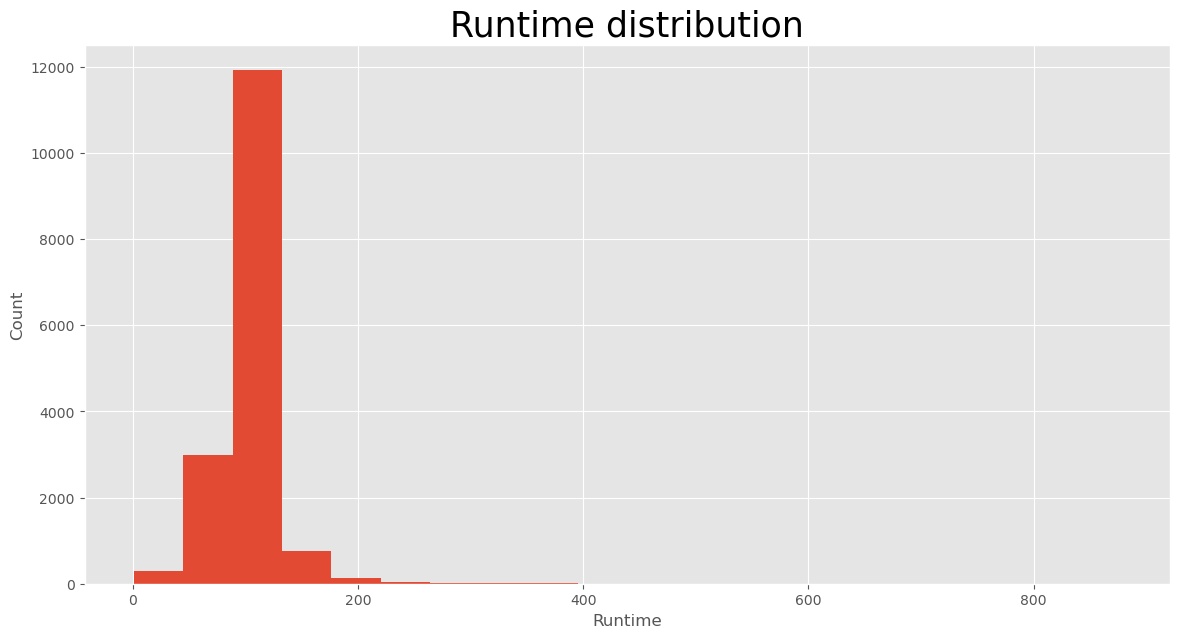

In [109]:
#fig = go.Figure(data=[go.Histogram(x=df_merge_all['runtime'])])
# have a look at feature distributions
# Create a histogram
#fig = px.histogram(df_merge_all.runtime, x="runtime",title="Runtime distribution")
#fig.show()
plt.figure(figsize=(14,7))
plt.hist(df_imdb_clean_final.runtime, bins=20)
# Adding a title and labels to the histogram
plt.title("Runtime distribution",size=25)
plt.xlabel("Runtime")
plt.ylabel("Count")
# Showing the histogram
plt.show()

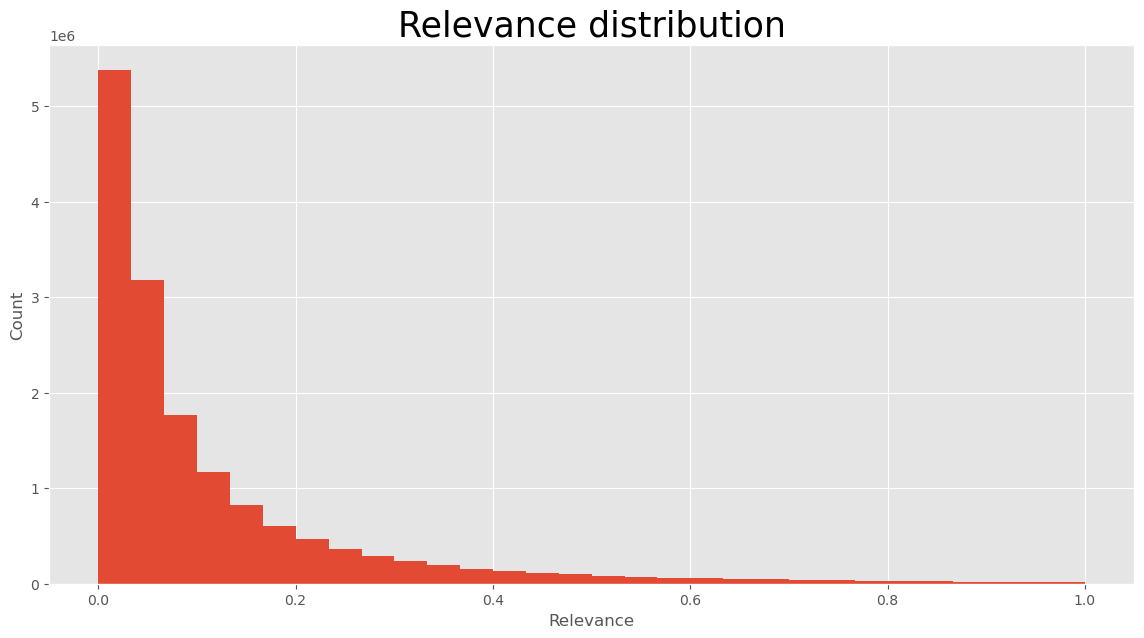

In [110]:
plt.figure(figsize=(14,7))
plt.hist(df_genome_scores.relevance, bins=30)
# Adding a title and labels to the histogram
plt.title("Relevance distribution",size=25)
plt.xlabel("Relevance")
plt.ylabel("Count")
# Showing the histogram
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


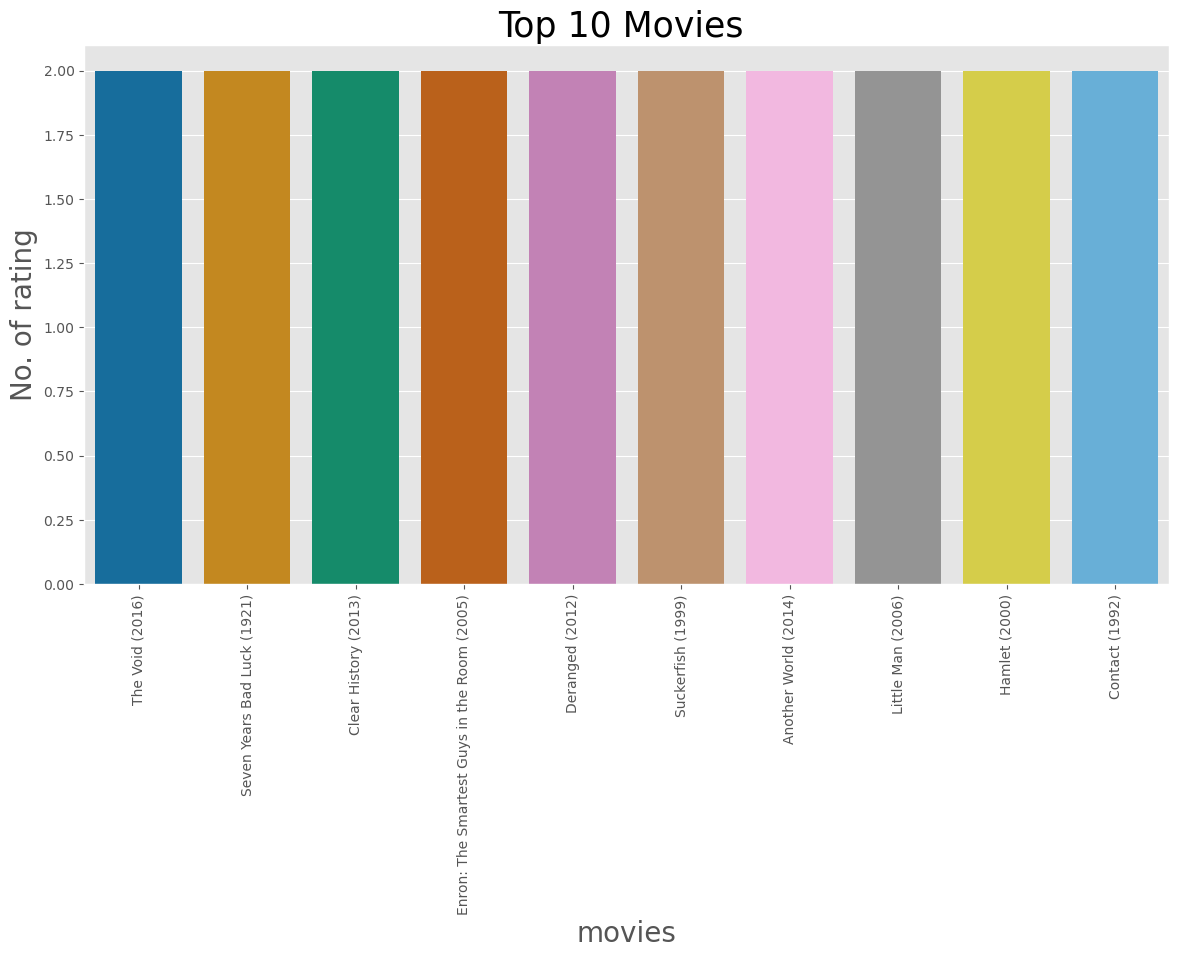

In [120]:




fig, ax = plt.subplots(figsize=(14, 7))
sns.countplot(x='title', data=df_movies, palette='colorblind',
              order=df_movies['title'].value_counts().head(10).index)
plt.xticks(rotation=90)
plt.xlabel('movies', size=20)
plt.ylabel('No. of rating', size=20)
plt.title('Top 10 Movies ', size=25)
plt.show()

#### Investigating the number of views in a month

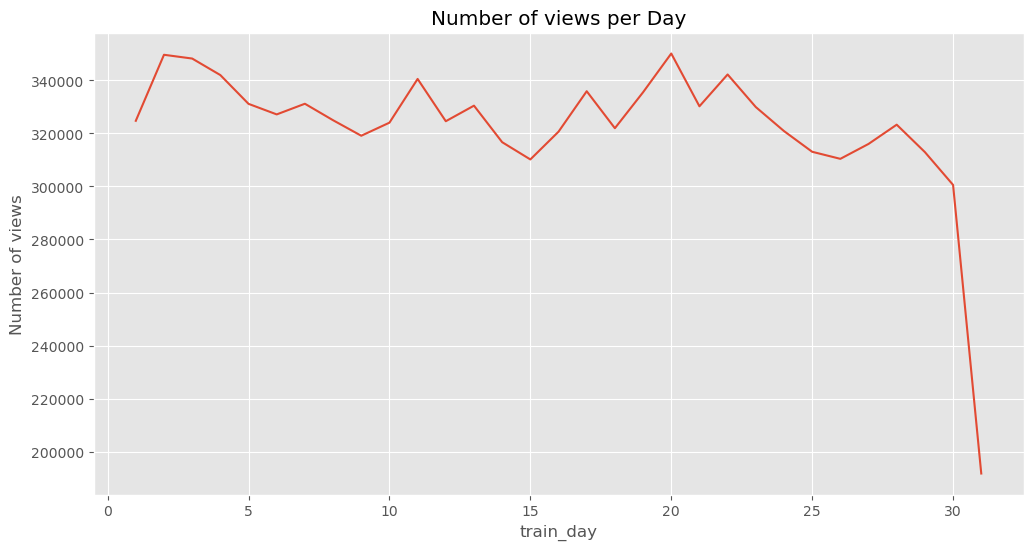

In [121]:
# Group rating by Day-of-Week
dt = df_train_clean.groupby(['train_day'])['rating'].count().reset_index()
# Make a line Plot of the grouping
fig, (ax) = plt.subplots(ncols=1, figsize=(12,6))
plt.plot(dt['train_day'],dt['rating'])
plt.xlabel('train_day') 
plt.ylabel('Number of views') 
plt.title('Number of views per Day')
plt.show()

Most of the views are for the movies are found within the date 2 to 30 this is probably due to subscription trend for the viewers where by they use the first two days of the month to subscribe to the platform

### Investigating the nummber of rating done by users  per month 

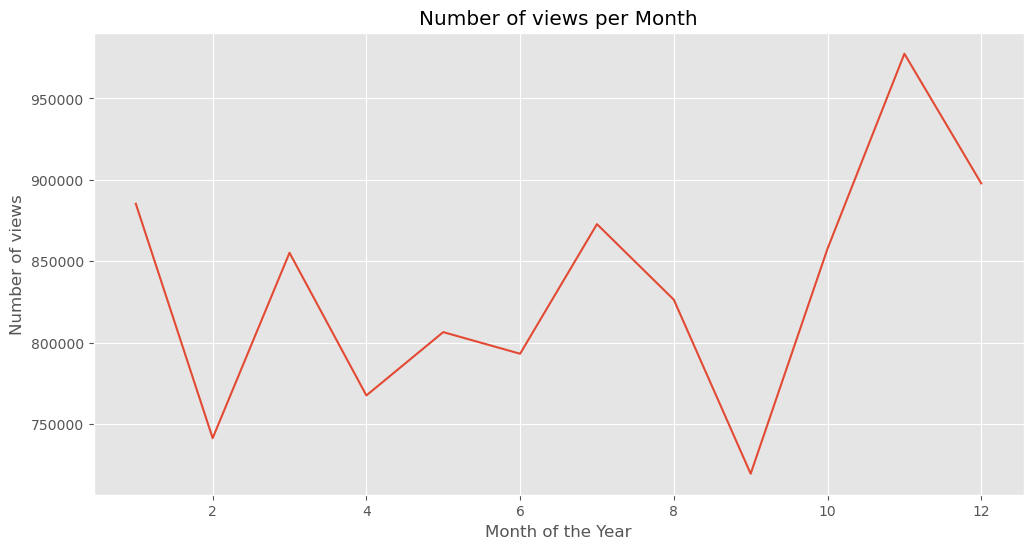

In [122]:
# Group rating by Month
dt = df_train_clean.groupby(['train_month'])['rating'].count().reset_index()
# Make a line Plot of the grouping
fig, (ax) = plt.subplots(ncols=1, figsize=(12,6))
plt.plot(dt['train_month'],dt['rating']) 
plt.xlabel('Month of the Year') 
plt.ylabel('Number of views')
plt.title('Number of views per Month')
plt.show()

In [ ]:
counter(df_train_finally.rating)


During the months commonly referred to as the Ember Months, there is a noticeable decline in movie engagement, marked by a significant reduction in both votes and views. This trend is especially prominent in August, leading into September, coinciding with the commencement of the new financial year. During this period, individuals often focus on administrative tasks, record-keeping, and report preparation, diverting attention away from leisure activities like watching movies.

Conversely, the holiday periods exhibit sharp peaks in movie engagement, particularly during Easter and the Summer break. Notably, students have an extended break during the summer, spanning eight to nine weeks from late June to early September. This extended vacation provides ample time for individuals, including students, to indulge in entertainment activities, making it an opportune period for heightened movie viewership.

<a id="four"></a>
## 7. Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

    
             ⚡ Description: Feature  engineering ⚡ 
 
Here we will be creating new features engineered from the already existing features which will be helpful for creating a more accurate `Movie Recommemder System`

For collaborative filtering, we will focus more on movie viewer behaviours i.e the impression that the movie leaves to the movie viewer. This will be Rating of the movies so the most important features will `userId` , `movieId` and `rating` 

**Preprocessing**

We need continuous IDs to be able to index into the embedding matrix and access each 

user/item embedding.

For our collaborative user based algorithm we will need to create  a utitlity matrix that will be helpful  to our training data sert

In [ ]:
# creating a copy of the train dataframe
df_train_clean_features=df_train_clean.copy()

We will have to do away with the useless features for our collabrative algorithms 

In [ ]:
#dropping unnecessary features
df_train_clean_features=df_train_clean_features.drop(['train_year','train_month','train_day'], axis =1 )

Creating the sparse  matrix and compressing the matrix

The CSR matrix format is chosen for several reasons:

Efficient Memory Usage: Sparse matrices can be very memory-intensive due to the large number of zero elements. CSR efficiently represents sparse matrices by storing only the non-zero values and their corresponding row and column indices.

Speed of Matrix Operations: CSR format allows for faster matrix-vector and matrix-matrix multiplication operations. This is important for collaborative filtering algorithms where such operations are performed frequently.

Scalability: In recommendation systems, the user-item interaction matrix can be extremely large. CSR format enables efficient storage and manipulation of large sparse matrices, making it suitable for handling large datasets.

Algorithm Compatibility: Many machine learning libraries and collaborative filtering algorithms are designed to work efficiently with sparse matrices, and CSR is a widely supported sparse matrix format.

In [ ]:

# Ensure userId and movieId are zero-based indices
df_train_clean['userId'] = df_train_clean['userId'] - df_train_clean['userId'].min()
df_train_clean['movieId'] = df_train_clean['movieId'] - df_train_clean['movieId'].min()

# Create the sparse matrix
user_item_matrix = csr_matrix((df_train_clean['rating'], (df_train_clean['userId'], df_train_clean['movieId'])))

# Print the matrix
print(user_item_matrix)
#user_item_matrix =df_train_clean_features.pivot(index=['userId'], columns=['movieId'], values='rating').fillna(0)
#user_item_matrix

#### Feature engineering for Content based filtering algorithm

Here we will focus on the characteristics of the item ie
`genre`,`plot keyword`,`title cast` and `director` which are going  to be the main features that distinguish the respective movies in the dataset

In [ ]:
## spliting the genre using the commas 
df_movies_clean['genre_f'] =df_movies_clean['clean_genres'].apply(lambda x : ','.join(x.split(' ')))

In [ ]:
# merging movie data frame with imdb which contains mopst of the features for the movies eg plot kwywords etc
df_merge_movie_imdb=pd.merge(df_movies_clean,df_imdb_clean_final, on='movieId', how='inner')
df_merge_movie_imdb.head()

In [ ]:
#combining the three most important columns
cols = ['cast_pairs', 'director', 'genre_f']
df_merge_movie_imdb['combined'] = df_merge_movie_imdb[cols].apply(lambda row: ','.join(row.values.astype(str)), axis=1)

In [ ]:
#combining the space separated words into one using the underscore for our vectorizer
df_merge_movie_imdb['combined']=df_merge_movie_imdb['combined'].apply(lambda x : '_'.join(x.split(' ')))

Vectorizing the features of the movies so that we can create a matrix that will be used for training or filtering

In [ ]:
#vectorising the combined column to create maximum features for our dataset
tf = TfidfVectorizer(ngram_range=(1,1),stop_words='english')
tf_matrix = tf.fit_transform(df_merge_movie_imdb['combined'])
cosine_sim = cosine_similarity(tf_matrix, tf_matrix)
cosine_sim_df = pd.DataFrame(cosine_sim)

In [ ]:
cosine_sim_df.head()

In [ ]:
Counter(df_train_finally.rating)

In [ ]:
# Merge based on the 'common_key' column
df_merge_train_movie_title = pd.merge(df_train, df_movies[['movieId','title']], on='movieId')

In [ ]:
df_merge_train_movie_title.head()

<a id="five"></a>
## 8. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>
    
                ⚡ Description: Modelling ⚡ 
In this section, you are required to create one or more clustering modells that will be useful in making predictions in movie rating for our `Movie Recommender system`

#### Content-based filtering 
is a recommendation algorithm that suggests items to users based on the content features of the items and the preferences expressed by the user. Here's a simplified explanation of how content-based filtering works:

Item Representation:

Each item (e.g., movies, articles, products) is represented using a set of features. These features describe the characteristics of the item.
For example, in a movie recommendation system, the features could include genre, director, actors, and keywords.
-  User Profile:

The system maintains a profile for each user based on their preferences for certain features.
For example, a user who likes action movies with specific actors might have a preference for movies with those features in the user profile.
-  Recommendation Generation:

When a user requests recommendations, the system compares the user profile with the features of available items.
It recommends items that match the user's preferences based on the content features.
The recommendation score is calculated based on how well the features of an item align with the user's preferences.
-  Example:

Suppose a user has previously liked action movies with Tom Cruise and wants recommendations.
The content-based system identifies movies with the genre 'action' and features related to Tom Cruise.
It recommends movies that have a high content similarity to the user's preferences.
-  Advantages:

Content-based filtering doesn't rely on historical user behavior or preferences.
It can provide personalized recommendations for users with unique tastes.
-  Limitations:

Limited serendipity: Content-based systems may recommend similar items, leading to less diversity in recommendations.
Cold start problem: It may face challenges when a new user joins the system, as there is limited information about their preferences.
-  Implementation:

The implementation involves creating item profiles, user profiles, and a mechanism for calculating the similarity between items and user preferences based on content features.

In [ ]:
#creating a reverse mapping
indices = pd.Series(df_merge_movie_imdb.index, index=df_merge_movie_imdb['title'])

In [ ]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df_merge_movie_imdb['title'].iloc[movie_indices]

In [ ]:
get_recommendations('Toy Story(1995)', cosine_sim)

### Collaborative filtering recommenders system

Collaborative filtering methods are a type of recommendation system that make predictions (filtering) about the preferences of a user by leveraging the preferences and behaviors of other users (collaboration). There are two main types of collaborative filtering methods:

User-Based Collaborative Filtering:

User-based collaborative filtering recommends items based on the preferences of users who are similar to the target user. The idea is that if two users have similar tastes or preferences and one of them liked a particular item, the other user is likely to enjoy that item as well.
Steps:
Compute similarity between users (e.g., cosine similarity, Pearson correlation).
Identify a set of users similar to the target user.
Recommend items liked by similar users that the target user has not yet seen or rated.
Item-Based Collaborative Filtering:

Item-based collaborative filtering recommends items similar to those the target user has liked or interacted with. It identifies items that are similar to the ones the user has shown interest in and recommends them based on this similarity.
Steps:
Compute similarity between items (e.g., cosine similarity, Pearson correlation).
Identify a set of items similar to those liked by the target user.
Recommend the most similar items that the target user has not yet seen or rated.
Collaborative filtering methods can be further categorized into memory-based and model-based approaches:

#### Memory-Based Collaborative Filtering:

Memory-based methods directly use user-item interaction data to compute similarities and make recommendations. Examples include user-user collaborative filtering and item-item collaborative filtering.
Advantages: Simplicity and transparency.
Disadvantages: Can suffer from the sparsity of the user-item matrix and may not scale well.

####  Model-Based Collaborative Filtering:

Model-based methods use machine learning algorithms to learn patterns and make predictions. Matrix factorization techniques, such as `Singular Value Decomposition (SVD)` and `Non-Negative Matrix Factorization (NMF)`, are common in model-based collaborative filtering.

Advantages:

Can handle sparse data better, scalable to larger datasets.
Disadvantages: May be more complex and require training a model.
Popular collaborative filtering libraries and frameworks include Surprise (Python library), Mahout, and LensKit. `We will be using Surprise library`

Remember that collaborative filtering methods rely on user-item interaction data and may face challenges such as the cold start problem for new users or items and the scalability issue with large datasets. Hybrid approaches, combining collaborative filtering with other methods, are often used to address these challenges.

In [ ]:



df_train_1=df_train.drop(['timestamp','f_time','train_year','train_month','train_day'], axis = 1)
#our training data
df = pd.DataFrame(df_train_1.sample(n=4070000))
#del df[['timestamp','f_time','train_year','train_month','train_day']]

#our training data
df_svd = pd.DataFrame(df_train_1)
#del df_svd[['timestamp','f_time','train_year','train_month','train_day']]

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(0, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

# The columns must correspond to user id, item id and ratings (in that order).
datasvd = Dataset.load_from_df(df_svd[['userId', 'movieId', 'rating']], reader) #preparing more data for svd algorithms
# get a prediction for specific users and items.
sim_options = {
    "name": "cosine",
    "user_based": True,  # compute  similarities between items
}


In [ ]:
df_svd.head()

In [ ]:
#test train split of the data
trainset, testset = train_test_split(data, test_size=.10)
#test train split of the data
trainsetsvd, testsetsvd = train_test_split(datasvd, test_size=.10)

In [ ]:
# logging my parameter to commet

experiment = Experiment(
  api_key="D4Zp3UqjjPbL3hd2Zm6216uHU",
  project_name="recommender",
  workspace="benka874"
)

## Model-Based Collaborative Filtering:

Model-Based Collaborative Filtering is a category of recommendation systems that builds predictive models using machine learning algorithms. It involves creating a model based on the patterns and relationships present in the user-item interaction data

#### 1.SVD 
is a mathematical technique used in linear algebra and data analysis. In the context of recommendation systems, SVD is often employed for collaborative filtering. 

In [ ]:
# Use movielens-100K
#data1 = Dataset.load_builtin("ml-100k")
algosvd_model=SVD()
#algosvd.fit(trainset)
#pred= algosvd.test(testset)
#accuracy.rmse(pred)

# Evaluate performances of our algorithm on the dataset.
#cvSVD=cross_validate(algosvd, data, measures=['RMSE'],cv=3, verbose=True)

# Fit traind Data
algosvd_model.fit(trainsetsvd)
# Validate Predictions
SVD_predictions = algosvd_model.test(testsetsvd)
# Return RMSE Result
SVD_rmse=accuracy.rmse(SVD_predictions)

#### Limitation
- Cold Start Problem:

SVD struggles with new users or items with limited or no historical data, making it challenging to provide accurate recommendations for them.

- Sparse Data Issues:

When dealing with sparse matrices (many missing values), SVD may lead to less accurate predictions due to difficulty in capturing meaningful patterns.

- Scalability:

Computing SVD can be computationally expensive, especially for large datasets. Real-time updates or computations for dynamic systems may be challenging.

- Global Patterns Only:

SVD captures global patterns but may overlook local or personalized preferences, as it focuses on the overall structure of the data.

- Sensitivity to Noise:

SVD is sensitive to noise and outliers in the data, which can impact the accuracy of predictions.

- Interpretability:

The latent factors extracted by SVD may not always have clear or interpretable meanings, making it challenging to understand the reasoning behind recommendations.

- Assumption of Linearity:

SVD assumes linear relationships between users and items, which might not hold true for all types of user-item interactions.

#### 2.Non-Negative Matrix Factorization (NMF)
is a matrix factorization technique used in machine learning and data analysis. It decomposes a given matrix into the product of two lower-dimensional matrices, ensuring that all elements in the matrices are non-negative. NMF is particularly useful for analyzing non-negative data, such as images, text, and audio.

In [ ]:

# Assuming you have a DataFrame named 'df' with columns 'userId', 'movieId', and 'rating'
#data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

# Create a parameter grid for GridSearchCV
param_grid = {"n_epochs": [5, 10]}

# Create the GridSearchCV object
algoNMF_model = NMF()

# Evaluate performances of our algorithm on the dataset.
#cvNMF=cross_validate(algoNMF, data, measures=['RMSE'],cv=5, verbose=True)

# Fit traind Data
algoNMF_model.fit(trainset)
# Validate Predictions
NMF_predictions = algoNMF_model.test(testset)
# Return RMSE Result
NMF_rmse=accuracy.rmse(NMF_predictions)
#algoKNNBase = KNNBaseline(k=60, min_k=2, sim_options=sim_options)
#cross_v = cross_validate(algoKNNBase, data, measures=['rmse'], cv=10, verbose=True)

#### Limitations
- Positive Numbers Only:

NMF insists on using only positive numbers, which might not always match the actual data.
Multiple Solutions:

NMF doesn't always give one clear answer. Different starting points can lead to different results.

- Dealing with Lots of Zeros:

NMF may struggle when there are many zero values in the data, like in sparse datasets.
Handling Missing Data is Tricky:

NMF works best when all data is present. Dealing with missing information can be challenging.

- Not Great with Complex Patterns:

It's like fitting straight lines to data; struggles when relationships are more complicated.
- Sensitive to Noise:

NMF can be influenced by random variations or outliers in the data.

- Gets Slow with Lots of Features:

When dealing with many different aspects in the data, NMF can become slow and use a lot of memory.

- Understanding Factors Can be Tricky:

Figuring out the real-world meaning of the learned factors isn't always easy.

#### 3.The Slope One algorithm 
is a simple and effective collaborative filtering technique used in recommendation systems. It focuses on predicting a user's preferences based on the differences in ratings between items.

In [ ]:
# Initiate Model
slope_model = SlopeOne()
# Fit traind Data
slope_model.fit(trainset)
# Validate Predictions
slope_predictions = slope_model.test(testset)
# Return RMSE Result
slope_rmse=accuracy.rmse(slope_predictions)

#### Limitation

- Sparse Data Challenges:

Slope One struggles when there's not much information available. Predicting for items with few ratings may not be very accurate.

- New User or Item Issue:

It has a hard time dealing with new users or items that don't have enough history. Making predictions for them is tricky.

- Not Great with Complex Patterns:

Slope One keeps it simple, which is good, but it may miss capturing more complicated relationships between users and items.

#### 4.SVD++ (Singular Value Decomposition ++) 
is an extension of the Singular Value Decomposition (SVD) matrix factorization technique, commonly used in collaborative filtering for recommendation systems. The "++" in SVD++ indicates the inclusion of additional factors to enhance the model's performance.

In [ ]:
# Initiate Model
svdpp_model = SVDpp(n_epochs=10,n_factors=250,init_std_dev=0.001,random_state=42, verbose=True)
# Fit traind Data
svdpp_model.fit(trainsetsvd)
# Validate Predictions
svdpp_predictions = svdpp_model.test(testsetsvd)
# Return RMSE Result
svdpp_rmse = accuracy.rmse(svdpp_predictions)
svdpp_rmse

#### Limitation
- Computation Time: 
SVD++ can be slow, especially for large datasets, making it computationally expensive.

- Cold Start Problem: 
It struggles when dealing with new users or items without enough historical data.

- Sparse Data: 
SVD++ may not work well when there's limited interaction data between users and items.

- Implicit Feedback Challenges: 
Handling user interactions without explicit ratings can be tricky.

- Scalability:
Training on large datasets can be resource-intensive.

- Hyperparameter Tuning:
Finding the right settings for model parameters requires experimentation.

- Memory Usage: 
Storing learned data matrices may consume a lot of memory.

- Limited Interpretability: 
The model's recommendations may not be easy to explain.

#### The BaselineOnly algorithm

is a collaborative filtering algorithm used in recommendation systems. It predicts user-item ratings by considering baseline estimates for users and items

In [ ]:
# Initiate Model
bsl_options = {'method': 'sgd','n_epochs': 15}
# Fit traind Data
baseline_model = BaselineOnly(bsl_options=bsl_options,verbose=True)
# Validate Predictions
baseline_model.fit(trainset)
# Return RMSE Result
baseline_predictions = baseline_model.test(testset)
# Calculate RMSE
baseline_rmse = accuracy.rmse(baseline_predictions)

- Baselines:

It starts by estimating baseline ratings for users and items.
For each user, it guesses the average rating they tend to give.
For each item, it guesses the average rating it usually receives.
- Prediction:

To predict how a user might rate an item, it combines three things:
The overall average rating.
The user's baseline rating tendency.
The item's baseline rating tendency.
The prediction is the sum of these factors.
- Optimization:

It refines its guesses by minimizing the difference between actual ratings and predictions.
This helps improve the accuracy of baseline estimates.
- Advantages:

Provides a straightforward way to make personalized rating predictions.
Deals with the variability in user and item ratings.
- Limitations:

May not capture complex patterns as well as more advanced methods.
Faces challenges with new users or items with few ratings (cold start problem).
Implementation:

You can use libraries like Surprise in Python to implement BaselineOnly.

## Memory-Based Collaborative Filtering:

Memory-Based Collaborative Filtering is a type of recommendation system that relies on the similarity between users or items to make predictions. It doesn't involve building a model but instead directly uses the user-item interaction data

#### creating pickle file for our models

SVD model

In [ ]:
# Save the model to a pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(algosvd_model, file)

SVDPP model

In [ ]:
# Save the model to a pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(svdpp_model, file)

#### Saving our subbmissiom file

In this section we will be creating submission file to our kaggle platform

In [ ]:
df_test.loc[:, 'rating'] = 0
df_test.head()

In [ ]:
#using load_from_df surprise function to load dataset for predictions
test_processed = Dataset.load_from_df(df_test[['userId','movieId','rating']], reader)

#Train test split, test size will be equal to 1.
NA, test = train_test_split(test_processed, test_size=1.0, shuffle = False, random_state = 42)

#Prediction 
predictions = algosvd_model.test(test)

In [ ]:
#saving the predictions as a list to add as a column for our Kaggle submission
rating = [n.est for n in predictions]
rating

In [ ]:
df_test_final=df_test.copy()

In [ ]:
df_test_final.head()

In [ ]:
df_test_final['Id'] = df_test_final['userId'].astype(str)  + '_'+ df_test_final['movieId'].astype(str) 
#change rating column
df_test_final['rating'] = rating
del df_test_final['userId']
del df_test_final['movieId']

In [ ]:
df_test_final['rating'] = df_test_final['rating'].apply(lambda x:round(x,1))


In [ ]:
df_test_final.head()

In [ ]:
cols = ['Id', 'rating']
df_test_final = df_test_final[cols]
df_test_final

In [ ]:
#df_test.rename(columns = {'rating2':'rating'}, inplace = True)
#df_test.head()
df_test_final.to_csv('Kagg_submission.csv', index = False)

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 9. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


#### Content-Based Recommender
Let's find similar movies to Monsters, Inc.. Set the number of the recommended movies as 5.

In [ ]:
get_recommendations('Soo Art of Revenge ', cosine_sim)

#### Collaborative-Based Recommender performance
Let us see which of the algorithms give us the lowest (better RMSE) score

Here we will be exploring the performamce of our models ie ie explore the performace of our content based model and the performance of our model based collaborative algorithms our model algorithms are `SVD`,`SVD++`,`Baselineonly`,`NMF`,`SlopeOne`

In [ ]:
# Composite RMSE Result of Collaborative models in DataFrame 
rmse_scores =[NMF_rmse, slope_rmse, SVD_rmse, svdpp_rmse, baseline_rmse]
models =['NMF', 'SlopeOne', 'SVD', 'SVD++', 'BaselineOnly']

accuracy_data = pd.DataFrame({'model':models,'RMSE':rmse_scores})

In [ ]:



params ={"random_state": 42,
         "model_type ": "SVD",
         "biased": True, 
         "verbose": True,
         'n_epochs': 60, 
         'n_factors': 300, 
         'init_std_dev': 0.004, 
         'lr_all': 0.006, 
         'reg_all': 0.04
        }

best_metrics ={"RMSE" : accuracy_data}

In [ ]:
#log parameters and results
experiment.log_parameters(params)
experiment.log_metric('RMSE', accuracy_data)
experiment.log_notebook('Unsupervised learning.ipynb', overwrite=False)

In [ ]:
experiment.end()

In [ ]:
# Compare model performance
# Visualize Outcome of Various Model Based Collab Recommenders
fig, ax = plt.subplots(figsize=(14,7))
# Plot Bar chart
sns.barplot(data=accuracy_data.sort_values(by='RMSE'), x='model', 
            y='RMSE', palette="colorblind", edgecolor="black", ax=ax)
# Set Labels
ax.set_xlabel("Recommender Models")
ax.set_ylabel('RMSE Score')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), 
            round(p.get_height(),3), fontsize=12, ha="center", va='bottom')
plt.title('Model Accuracy By RMSE Score', fontsize=14)
plt.show()

<a id="seven"></a>
## 10. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

generalized model.

#### Singular Value Decomposition++ (SVD++) 

is an extension of the Singular Value Decomposition (SVD) algorithm used in collaborative filtering for recommendation systems. It enhances the basic SVD by incorporating implicit feedback and considering implicit user preferences. Here's a simplified explanation of how SVD++ works:
- User-Item Interaction Matrix:

The recommendation system is based on a matrix representing user-item interactions. Rows correspond to users, columns correspond to items, and the entries contain user ratings or interactio- ns.
- Singular Value Decomposition (SVD):

SVD decomposes the user-item interaction matrix into three matrices: U (user matrix), Σ (diagonal matrix of singular values), and V^T (item matrix transpose).
The decomposition captures latent factors that represent hidden patterns or features in th- e data.
- Implicit Feedback:

SVD++ extends SVD by incorporating implicit feedback, which includes user interactions that are not explicitly rated but still convey preferences (e.g., clicks, views, purchases).
Implicit feedback is modeled by introducing additional user and item vectors to account for these implicit p- references.
- User and Item Bias:

SVD++ includes user and item bias terms to capture inherent tendencies of users to rate items higher or lower tha- n the average.
R- egularization:

Regularization terms are introduced to prevent overfitting and ensure a more generalized model.

<a id="seven"></a>
## 11. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>




A model is generally said to be good if it has it's RMSE below 1.0 and after seeing our results, We can say that our recommendation system works well enough.

Suggestion to further improving the predictive performance of our Model;

-  We could examine which users the models are having trouble predicting correctly and see if there is a correlation between those users. 

-  Secondly, there exist a possibility that the models might have a experincing cold start problem. If this is the case, then using collaborative filtering in conjunction with content based filtering algorithms `hybrid system`could help the problem by projecting such users to mimic similar users who had rated a lot of movies.

-  Our Content delt more on movie `genre`,`cast`, `title`, `rating` we can however add more into `links` ,`tags`  and `genome-scores` about the movies 